In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model

In [2]:
scaler = joblib.load('amazon_scaler.joblib')
model = load_model("Amazon_model.keras")

In [3]:
# Fetch data from Yahoo Finance
stock = yf.download("AMZN", start="2024-9-01", end="2025-1-30")
stock['Date'] = stock.index
prices = stock['Close'].values.reshape(-1, 1)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


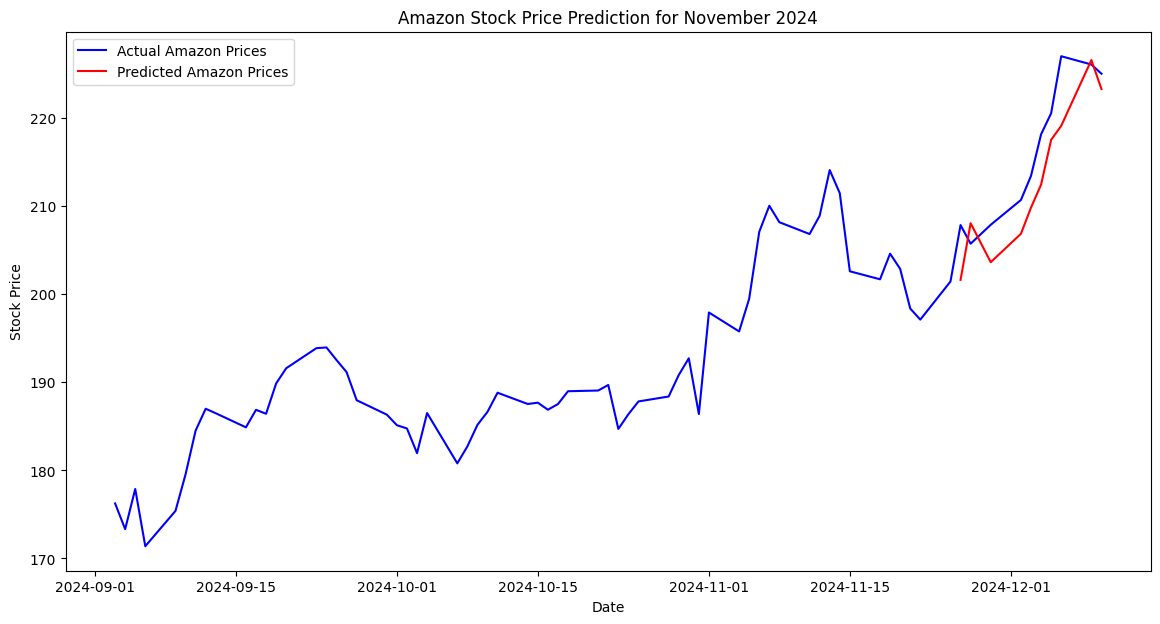

In [4]:
# Fetch data from Yahoo Finance
stock = yf.download("AMZN", start="2024-9-01", end="2025-1-30")
stock['Date'] = stock.index
prices = stock['Close'].values.reshape(-1, 1)

# Scale the data using the same scaler
# scaler = MinMaxScaler()
prices_scaled = scaler.transform(prices)

# Create sequences for prediction
seq_length = 60
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

X_future = create_sequences(prices_scaled, seq_length)

# Predict November 2024 stock prices
predictions = model.predict(X_future)
predictions_rescaled = scaler.inverse_transform(predictions)

# Plot real vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(stock['Date'], stock['Close'], label="Actual Amazon Prices", color='blue')
plt.plot(stock['Date'][seq_length:], predictions_rescaled, label="Predicted Amazon Prices", color='red')
plt.title("Amazon Stock Price Prediction for November 2024")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [9]:
stock

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,,
2024-01-02,149.929993,149.929993,152.380005,148.389999,151.539993,47339400,2024-01-02
2024-01-03,148.470001,148.470001,151.050003,148.330002,149.199997,49425500,2024-01-03
2024-01-04,144.570007,144.570007,147.380005,144.050003,145.589996,56039800,2024-01-04
2024-01-05,145.240005,145.240005,146.589996,144.529999,144.690002,45124800,2024-01-05
2024-01-08,149.100006,149.100006,149.399994,146.149994,146.740005,46757100,2024-01-08
...,...,...,...,...,...,...,...
2024-11-22,197.119995,197.119995,199.259995,196.750000,198.250000,31530800,2024-11-22
2024-11-25,201.449997,201.449997,201.949997,199.000000,199.279999,40685700,2024-11-25


In [ ]:
last_sequence = stock [-1]

In [10]:
seq_length = 60
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

X_future = create_sequences(prices_scaled, seq_length)

In [15]:
# https:/onepagecode.substack.com
last_sequence = X_future [-1]
last_sequence = last_sequence.reshape(1, 60, 1)
predictions_next_10_days = []
for _ in range(30):
    next_day_prediction = model.predict(last_sequence)
    predictions_next_10_days.append(next_day_prediction [0, 0]) # Get the predicted value
    last_sequence = np.roll(last_sequence, -1, axis=1) #Shift the sequence by one day
    last_sequence [0, -1, 0] = next_day_prediction #Update the last element with the new prediction
predictions_next_10_days = scaler.inverse_transform(np.array(predictions_next_10_days).reshape(-1, 1))
print("Predictions for the next 10 days:")
for i, prediction in enumerate (predictions_next_10_days, start=1):
    print(f"Day {1}: Predicted Price = {prediction [0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\omar\AppData\Local\Temp\ipykernel_16824\1633881330.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence [0, -1, 0] = next_day_prediction #Update the last element with the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

Text(0.5, 1.0, 'Predicted stock price of (company_name) for next 10 day')

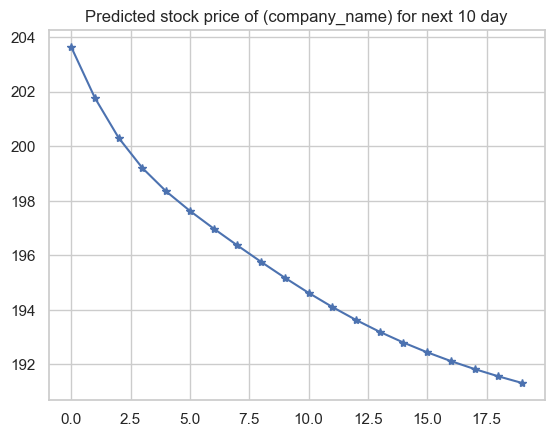

In [14]:
plt.plot(predictions_next_10_days, marker='*')
plt.title (f'Predicted stock price of (company_name) for next 10 day')

[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


C:\Users\omar\AppData\Local\Temp\ipykernel_16824\75693677.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axvspan(stock['Date'][seq_length], stock['Date'].iloc[-1], color='lightgrey', alpha=0.5, label="Prediction Range")


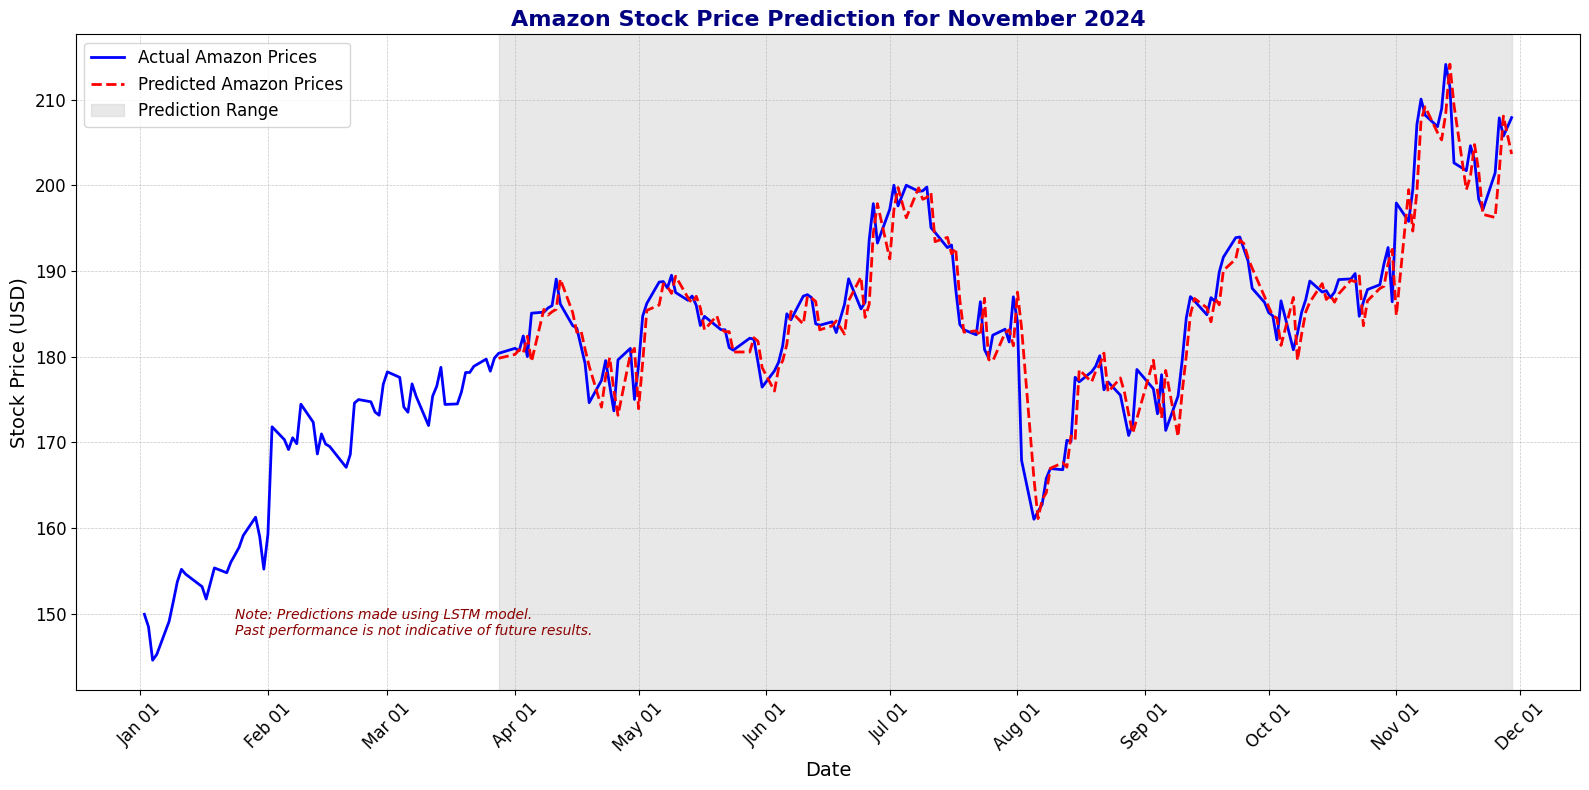

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model
from matplotlib.dates import DateFormatter

# Load scaler and model
scaler = joblib.load('amazon_scaler.joblib')
model = load_model("Amazon_model.keras")

# Fetch data from Yahoo Finance
stock = yf.download("AMZN", start="2024-01-01", end="2024-11-30")
stock['Date'] = stock.index
prices = stock['Close'].values.reshape(-1, 1)

# Scale the data using the same scaler
prices_scaled = scaler.transform(prices)

# Create sequences for prediction
seq_length = 60
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

X_future = create_sequences(prices_scaled, seq_length)

# Predict November 2024 stock prices
predictions = model.predict(X_future)
predictions_rescaled = scaler.inverse_transform(predictions)

# Plot real vs predicted prices with creative enhancements
plt.figure(figsize=(16, 8))

# Plot actual stock prices
plt.plot(stock['Date'], stock['Close'], label="Actual Amazon Prices", color='blue', linewidth=2)

# Plot predicted stock prices
plt.plot(stock['Date'][seq_length:], predictions_rescaled, label="Predicted Amazon Prices", color='red', linestyle='--', linewidth=2)

# Highlight prediction range
plt.axvspan(stock['Date'][seq_length], stock['Date'].iloc[-1], color='lightgrey', alpha=0.5, label="Prediction Range")

# Add vertical gridlines for better readability
plt.grid(visible=True, which='major', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Enhance title, labels, and legend
plt.title("Amazon Stock Price Prediction for November 2024", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price (USD)", fontsize=14)
plt.legend(fontsize=12, loc="upper left")

# Format x-axis dates
date_format = DateFormatter("%b %d")
plt.gca().xaxis.set_major_formatter(date_format)

# Rotate date labels for better visibility
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add a note for model predictions
plt.figtext(0.15, 0.2, "Note: Predictions made using LSTM model.\nPast performance is not indicative of future results.", 
            fontsize=10, color='darkred', style='italic')

# Show the plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


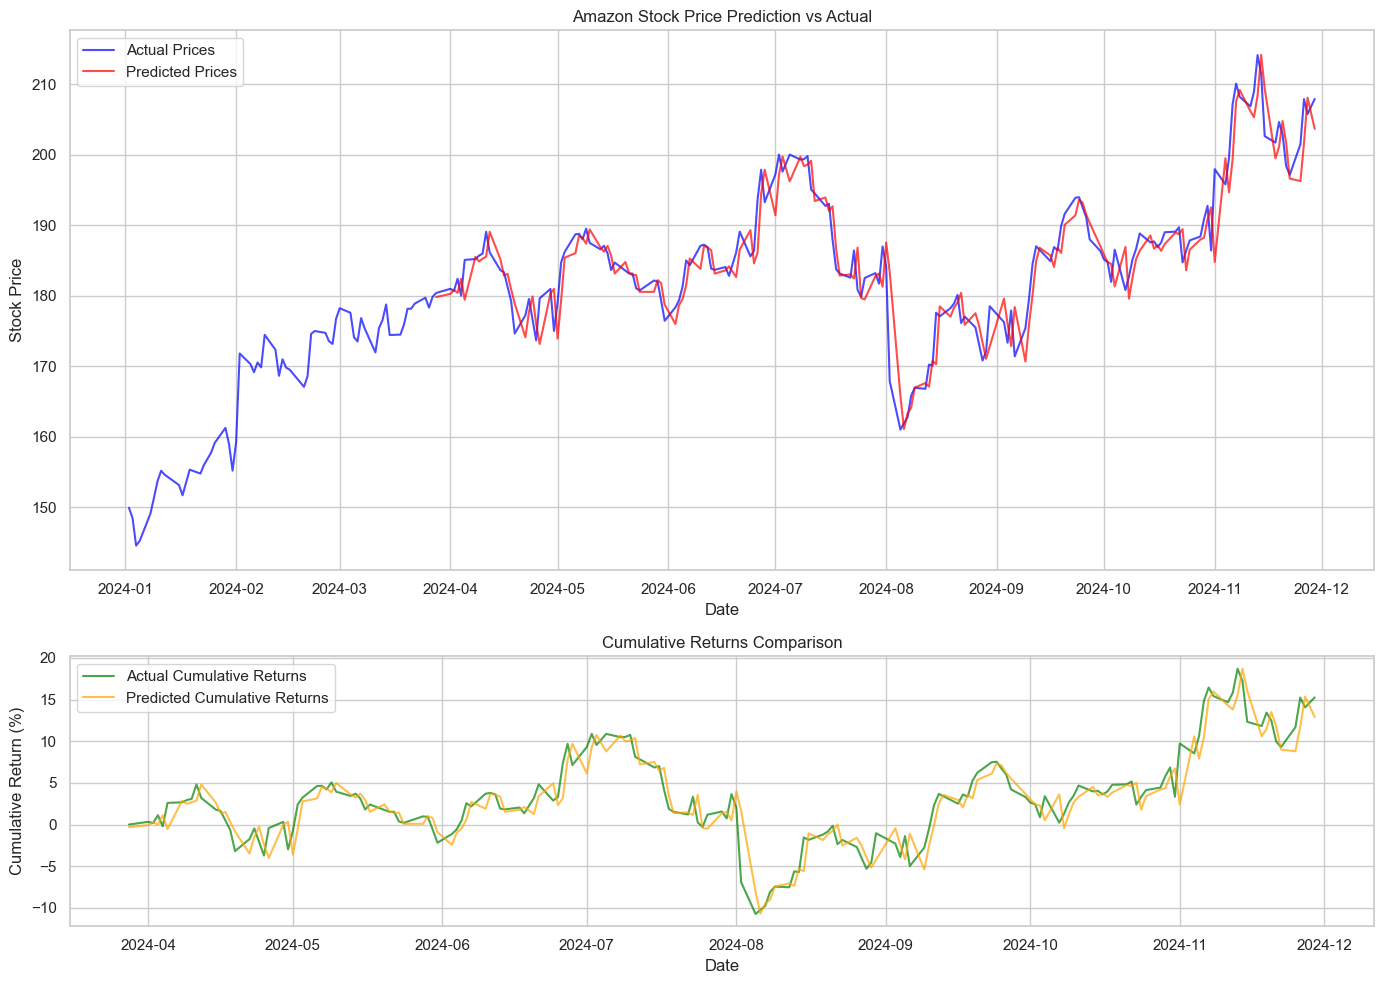

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from keras.models import load_model

# Load the scaler and model
scaler = joblib.load('amazon_scaler.joblib')
model = load_model("Amazon_model.keras")

# Fetch data from Yahoo Finance
stock = yf.download("AMZN", start="2024-01-01", end="2024-11-30")
stock['Date'] = stock.index
prices = stock['Close'].values.reshape(-1, 1)

# Scale the data using the same scaler
prices_scaled = scaler.transform(prices)

# Create sequences for prediction
seq_length = 60
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

X_future = create_sequences(prices_scaled, seq_length)

# Predict stock prices
predictions = model.predict(X_future)
predictions_rescaled = scaler.inverse_transform(predictions)

# Align actual stock prices with predictions
actual_prices_for_predictions = stock['Close'].iloc[seq_length:].values

# Calculate cumulative returns
cumulative_returns_actual = ((actual_prices_for_predictions / actual_prices_for_predictions[0]) - 1) * 100
cumulative_returns_predicted = ((predictions_rescaled.flatten() / actual_prices_for_predictions[0]) - 1) * 100

# Create a multi-panel visualization
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Real vs Predicted Prices
axes[0].plot(stock['Date'], stock['Close'], label="Actual Prices", color='blue', alpha=0.7)
axes[0].plot(stock['Date'][seq_length:], predictions_rescaled, label="Predicted Prices", color='red', alpha=0.7)
axes[0].set_title("Amazon Stock Price Prediction vs Actual")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Stock Price")
axes[0].legend()

# Plot 2: Cumulative Returns
axes[1].plot(stock['Date'][seq_length:], cumulative_returns_actual, label="Actual Cumulative Returns", color='green', alpha=0.7)
axes[1].plot(stock['Date'][seq_length:], cumulative_returns_predicted, label="Predicted Cumulative Returns", color='orange', alpha=0.7)
axes[1].set_title("Cumulative Returns Comparison")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Cumulative Return (%)")
axes[1].legend()

plt.tight_layout()
plt.show()
